In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
clean_loans = loans.copy()

In [5]:
clean_loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
clean_loans= clean_loans[['LoanStatus','LoanOriginalAmount', 'Term','BorrowerAPR',
             'CreditScoreRangeLower']]

In [7]:
clean_loans = clean_loans.dropna()
clean_loans.head()

,LoanStatus,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower
0,Completed,9425,36,0.16516,640.0
1,Current,10000,36,0.12016,680.0
2,Completed,3001,36,0.28269,480.0
3,Current,10000,36,0.12528,800.0
4,Current,15000,36,0.24614,680.0


In [8]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 5 columns):
LoanStatus               113346 non-null object
LoanOriginalAmount       113346 non-null int64
Term                     113346 non-null int64
BorrowerAPR              113346 non-null float64
CreditScoreRangeLower    113346 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.2+ MB


In [9]:
clean_loans.LoanOriginalAmount.min(),clean_loans.LoanOriginalAmount.max()

(1000, 35000)

In [10]:
clean_loans.LoanOriginalAmount.value_counts().sort_index()

1000     3158
1001        7
1005        2
1010        1
1025       31
         ... 
34000       5
34679       1
34700       1
34999       3
35000     430
Name: LoanOriginalAmount, Length: 2460, dtype: int64

In [11]:
clean_loans.Term.min(),clean_loans.Term.max()

(12, 60)

In [12]:
clean_loans.Term.value_counts().sort_index()

12     1614
36    87187
60    24545
Name: Term, dtype: int64

In [13]:
clean_loans.BorrowerAPR.min(),clean_loans.BorrowerAPR.max()

(0.006529999999999999, 0.42395)

In [14]:
clean_loans.BorrowerAPR.value_counts().sort_index() 

0.00653     2
0.00864     1
0.01315     2
0.01325     1
0.01548     1
           ..
0.40482     1
0.40679    11
0.40745     4
0.41355    55
0.42395     1
Name: BorrowerAPR, Length: 6635, dtype: int64

In [15]:
#It is possible to have a near zero percent APR when a bank is financing loans for third-parties. The best
# expample of these situations is in the instance of Auto Loans, financed at extremely low rates to incentivize a purchase.

In [16]:
clean_loans.CreditScoreRangeLower.min(),clean_loans.CreditScoreRangeLower.max()

(0.0, 880.0)

In [17]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

0.0        133
360.0        1
420.0        5
440.0       36
460.0      141
480.0      346
500.0      554
520.0     1593
540.0     1474
560.0     1357
580.0     1125
600.0     3602
620.0     4172
640.0    12199
660.0    16366
680.0    16492
700.0    15471
720.0    12923
740.0     9267
760.0     6606
780.0     4624
800.0     2644
820.0     1409
840.0      567
860.0      212
880.0       27
Name: CreditScoreRangeLower, dtype: int64

In [18]:
clean_loans = clean_loans.query('CreditScoreRangeLower > 0')

In [19]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

360.0        1
420.0        5
440.0       36
460.0      141
480.0      346
500.0      554
520.0     1593
540.0     1474
560.0     1357
580.0     1125
600.0     3602
620.0     4172
640.0    12199
660.0    16366
680.0    16492
700.0    15471
720.0    12923
740.0     9267
760.0     6606
780.0     4624
800.0     2644
820.0     1409
840.0      567
860.0      212
880.0       27
Name: CreditScoreRangeLower, dtype: int64

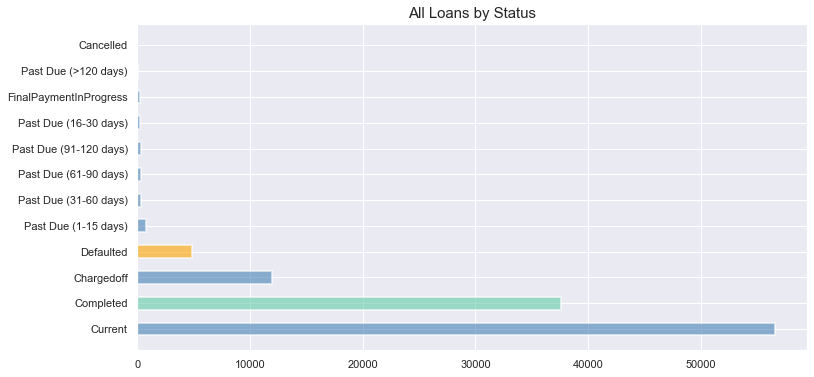

In [142]:
title = 15
keys = clean_loans['LoanStatus'].value_counts().keys()
values = clean_loans['LoanStatus'].value_counts().values
ht = 0.5
sb = 'steelblue'
ma = 'mediumaquamarine'

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, 
        color=[sb,ma,sb,'orange',sb,sb,sb,sb,sb,sb,sb,sb])
plt.title('All Loans by Status', size=title)
plt.show()

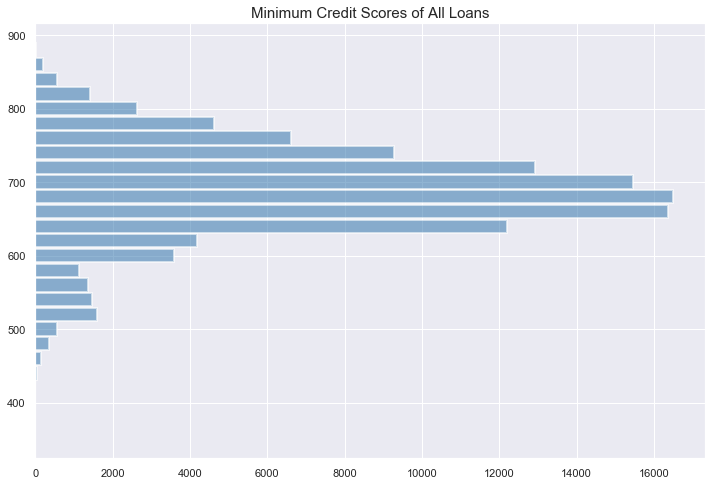

In [143]:
keys = clean_loans['CreditScoreRangeLower'].value_counts().keys()
values = clean_loans['CreditScoreRangeLower'].value_counts().values

ht = 18

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, color=sb)
plt.title('Minimum Credit Scores of All Loans', size=title)
plt.show()

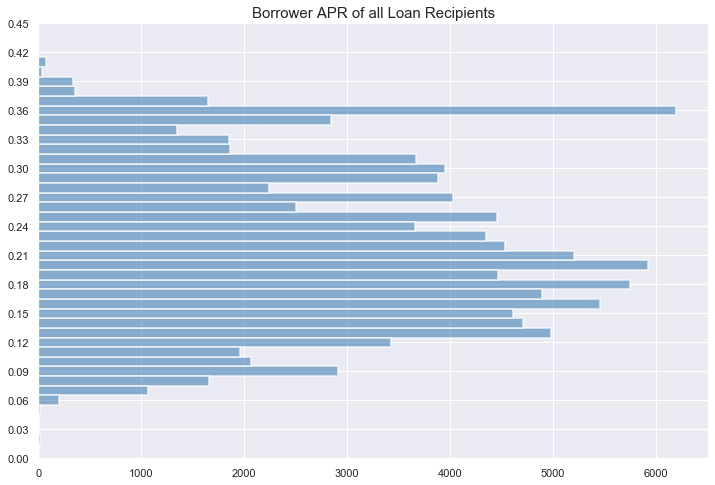

In [145]:
clean_loans['BorrowerAPR'] = round(clean_loans['BorrowerAPR'],2)

keys = clean_loans['BorrowerAPR'].value_counts().keys()
values = clean_loans['BorrowerAPR'].value_counts().values
ht = 0.01

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, color=sb)
plt.ylim(0, .45)
plt.yticks(np.arange(0, 0.45, step=.03))
plt.title('Borrower APR of all Loan Recipients', size=title)
plt.show()


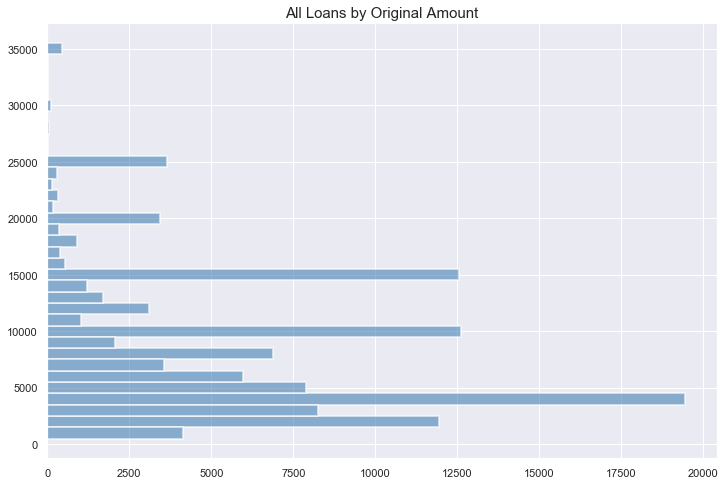

In [146]:
clean_loans['LoanOriginalAmount'] = round(clean_loans['LoanOriginalAmount'], -3)
keys = clean_loans['LoanOriginalAmount'].value_counts().keys()
values = clean_loans['LoanOriginalAmount'].value_counts().values

ht = 1000

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, color=sb)
plt.title('All Loans by Original Amount', size=title)
plt.show()

In [24]:
badloans = clean_loans.query("LoanStatus == 'Defaulted'")
badloans= badloans.drop(columns={'LoanStatus'})
badloans.sample(5)

,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower
7780,4000,36,0.31,660.0
88923,5000,36,0.27,560.0
87527,4000,36,0.22,640.0
13320,10000,36,0.19,660.0
84878,4000,36,0.16,540.0


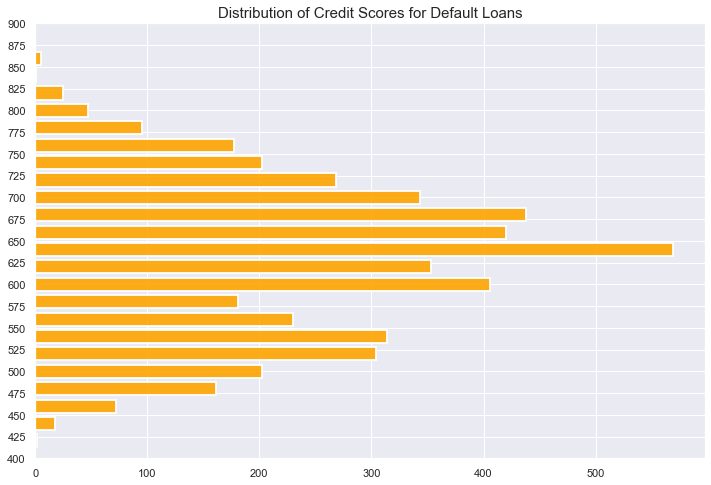

In [157]:
keys = badloans['CreditScoreRangeLower'].value_counts().keys()
values = badloans['CreditScoreRangeLower'].value_counts().values

ht = 15

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values,alpha=.9, edgecolor='white',linewidth=2, height= ht, color='orange')
plt.ylim(400,900)
plt.yticks(np.arange(400, 900+5, step=25))

plt.title('Distribution of Credit Scores for Default Loans',size=title)
plt.show()

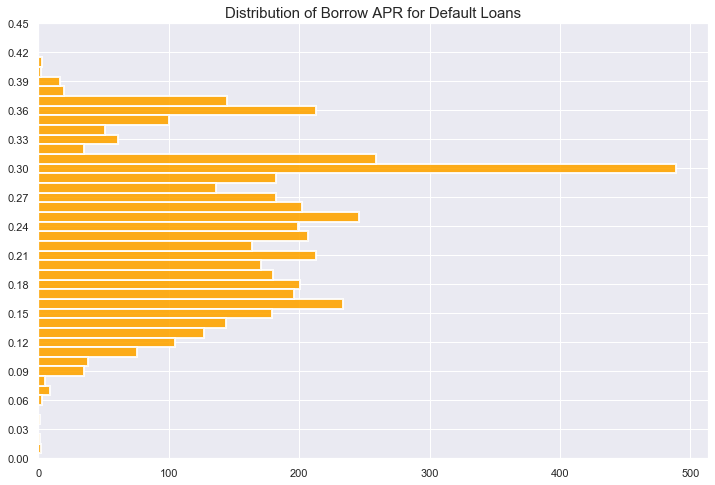

In [156]:
badloans['BorrowerAPR'] = round(badloans['BorrowerAPR'],2)
keys = badloans['BorrowerAPR'].value_counts().keys()
values = badloans['BorrowerAPR'].value_counts().values
ht = 0.01

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values,alpha=.9,edgecolor='white',linewidth=2, height= ht, color='orange')
plt.ylim(0, .45)
plt.yticks(np.arange(0, 0.45, step=.03))
plt.title('Distribution of Borrow APR for Default Loans',size=title)
plt.show()


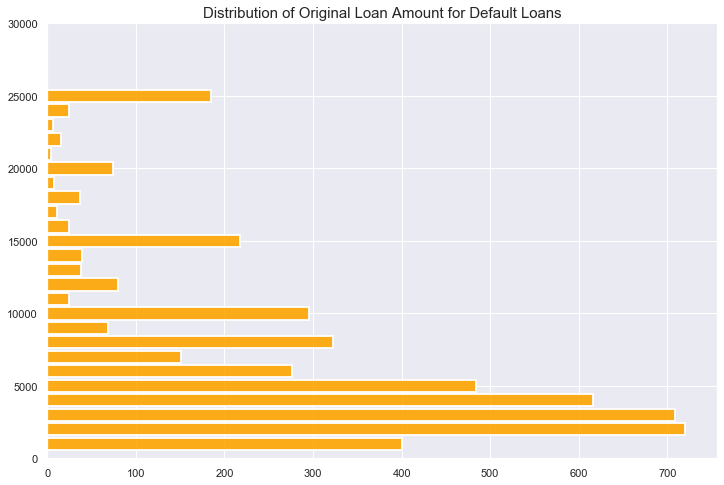

In [158]:
badloans['LoanOriginalAmount'] = round(badloans['LoanOriginalAmount'], -3)
keys = badloans['LoanOriginalAmount'].value_counts().keys()
values = badloans['LoanOriginalAmount'].value_counts().values

ht = 850

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values,alpha=.9, edgecolor='white',linewidth=2, height= ht, color='orange')

plt.ylim(0,30000)
plt.title('Distribution of Original Loan Amount for Default Loans', size=title)
plt.show()

In [28]:
badloans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833 entries, 15 to 113926
Data columns (total 4 columns):
LoanOriginalAmount       4833 non-null int64
Term                     4833 non-null int64
BorrowerAPR              4833 non-null float64
CreditScoreRangeLower    4833 non-null float64
dtypes: float64(2), int64(2)
memory usage: 188.8 KB


Text(0.5, 1.0, 'Distribution of Borrower APR for All Default Loans')

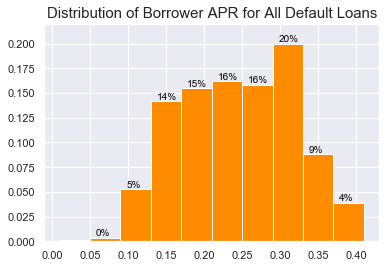

In [150]:
weights_df=np.ones(len(badloans)) / len(badloans)

counts, bins, bars = plt.hist(badloans['BorrowerAPR'], weights=weights_df, bins=10,color='darkorange')
plt.ylim(0,.22)
for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.0075,counts[i]+.002, s=f"{val:.0f}%",color='black')
plt.title('Distribution of Borrower APR for All Default Loans',size=title)

(0, 0.42)

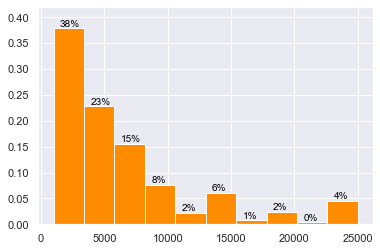

In [30]:
counts, bins, bars = plt.hist(badloans['LoanOriginalAmount'], weights=weights_df, bins=10,color='darkorange')

for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+500,counts[i]+.004, s=f"{val:.0f}%",color='black')
plt.ylim(0,.42)

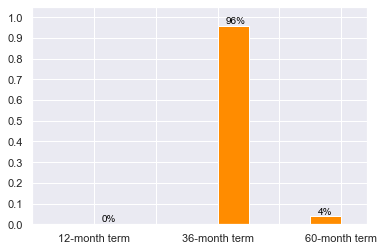

In [31]:
counts, bins, bars = plt.hist(badloans['Term'], weights=weights_df, bins=8,color='darkorange')

for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+1.5,counts[i]+.01, s=f"{val:.0f}%",color='black')


plt.ylim(0,1.05)
plt.xlim(0,65)
plt.yticks(np.arange(0, 1+.05, step=0.1))
plt.xticks(np.arange(0,60+2,12),labels=['','12-month term','','36-month term','','60-month term']);

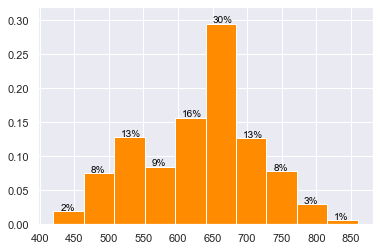

In [32]:
counts, bins, bars = plt.hist(badloans['CreditScoreRangeLower'], weights=weights_df, bins=10,color='darkorange')


for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+10,counts[i]+.001, s=f"{val:.0f}%",color='black')

plt.ylim(0,.32)
plt.yticks(np.arange(0,.30+.01,step=.05))
plt.xticks(np.arange(400,880,step=50));

C:\Users\E43652\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


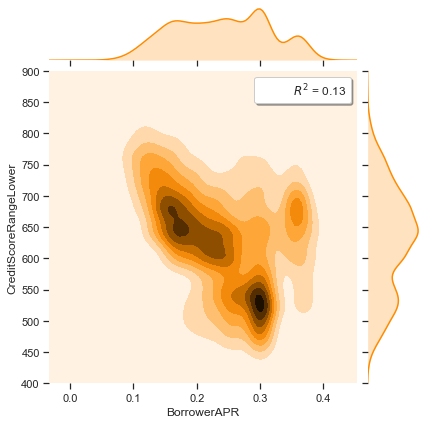

In [33]:
#Create a joint plot for BorrowerAPR and CreditScore
sns.set_style('ticks')
j = sns.jointplot(x='BorrowerAPR',y='CreditScoreRangeLower',data=badloans,
              kind='kde', shade=True, color='darkorange')
sns.despine(left=True, bottom=True)
plt.ylim(400,900)
plt.yticks(np.arange(400,900+1,50))
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
j = j.annotate(rsquare, template="{stat} = {val:.2f}",
stat="$R^2$",loc="upper right", fontsize=12, shadow=True)
plt.show();

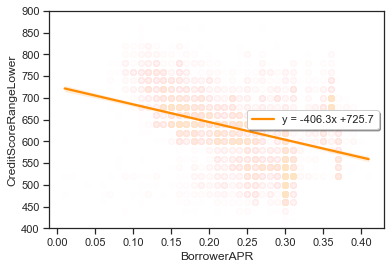

In [34]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(badloans['BorrowerAPR'],badloans['CreditScoreRangeLower'])
slope = round(slope,1)
intercept = round(intercept,1)

ax =sns.regplot(x=badloans['BorrowerAPR'],y=badloans['CreditScoreRangeLower'], scatter_kws={'color':'bisque','alpha':0.009},
           line_kws={'color':'darkorange', 'label': f"y = {slope}x +{intercept}"},truncate=True)
plt.ylim(400,900)
plt.yticks(np.arange(400,900+1,50))

ax.legend(loc=7,facecolor='white',shadow=True)

plt.title('',size=14);

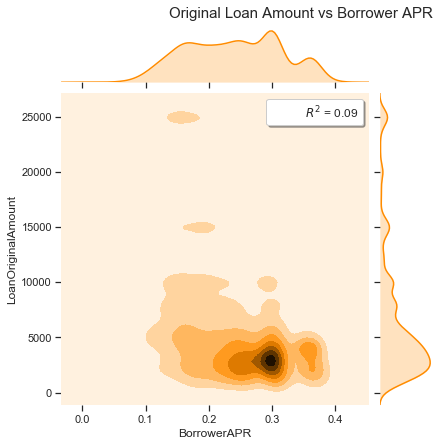

In [35]:
sns.set_style('ticks')
j = sns.jointplot(x='BorrowerAPR',y='LoanOriginalAmount',data=badloans,
              kind='kde', shade=True, color='darkorange')
sns.despine(left=True, bottom=True)
plt.title('Original Loan Amount vs Borrower APR',loc='right', pad=75,size=15)

j = j.annotate(rsquare, template="{stat} = {val:.2f}",
stat="$R^2$",loc="upper right", fontsize=12,shadow=True);

''

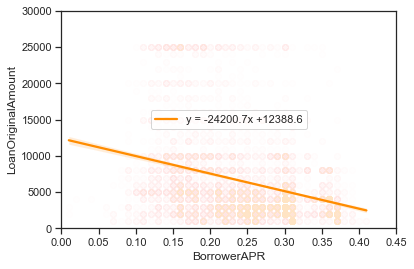

In [36]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(badloans['BorrowerAPR'],badloans['LoanOriginalAmount'])
slope = round(slope,1)
intercept = round(intercept,1)

ax = sns.regplot(x=badloans['BorrowerAPR'],y=badloans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
            line_kws={'color':'darkorange', 'label': f"y = {slope}x +{intercept}"}, truncate=True)

plt.xlim(0,.45)
plt.ylim(0,30000)
plt.yticks(np.arange(0,30000+1, 5000))
ax.legend(loc=10)
;

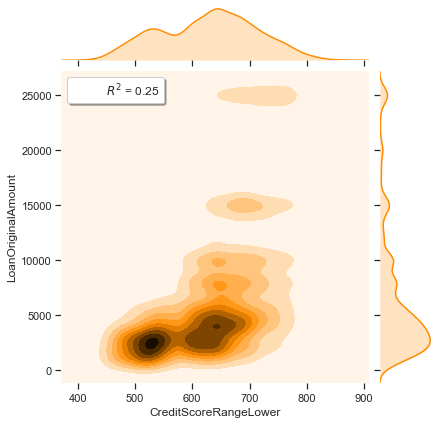

In [37]:
sns.set_style('ticks')
j= sns.jointplot(x='CreditScoreRangeLower',y='LoanOriginalAmount',data=badloans,
              kind='kde',shade=True, color='darkorange')
sns.despine(left=True, bottom=True)
j = j.annotate(rsquare, template="{stat} = {val:.2f}",
stat="$R^2$",loc="upper left", fontsize=12, shadow=True)
plt.show();

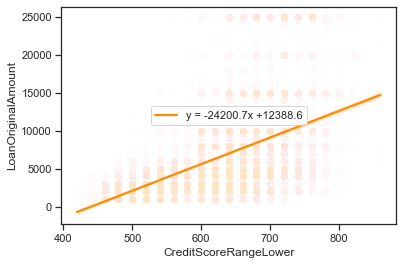

In [38]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(badloans['BorrowerAPR'],badloans['LoanOriginalAmount'])
slope = round(slope,1)
intercept = round(intercept,1)

ax = sns.regplot(x=badloans['CreditScoreRangeLower'],y=badloans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'darkorange', 'label': f"y = {slope}x +{intercept}"}, truncate=True);

ax.legend(loc=10)
plt.show()

In [39]:
complete_loans = clean_loans.query("LoanStatus == 'Completed'")

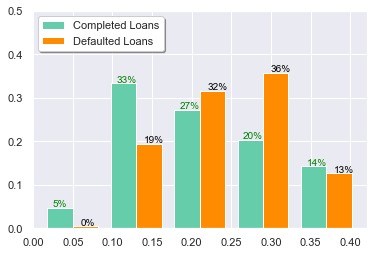

In [87]:
sns.set_style('darkgrid')

weights_df=np.ones(len(badloans)) / len(badloans)
weights_cl=np.ones(len(complete_loans)) / len(complete_loans)

x = complete_loans['BorrowerAPR']
y = badloans['BorrowerAPR']


counts, bins, bars= plt.hist([x, y], label=['Completed Loans','Defaulted Loans'], bins=5 ,weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])

counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.015,counts_0[i]+.002, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.05,counts_1[i]+.002, s=f"{val:.0f}%",color='black')    
plt.ylim(0,0.50)
plt.legend(loc='upper left',facecolor='white',shadow=True);

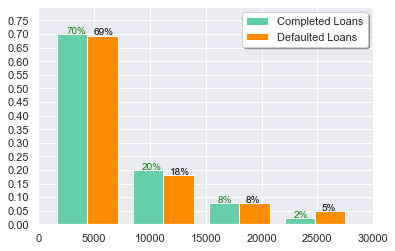

In [88]:
x = complete_loans['LoanOriginalAmount']
y = badloans['LoanOriginalAmount']

counts, bins, bars = plt.hist([x, y], label=['Completed Loans','Defaulted Loans'], bins=5, weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])


counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+1500,counts_0[i]+.002, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+4000,counts_1[i]+.002, s=f"{val:.0f}%",color='black')   


plt.xlim(0,30000)
plt.ylim(0,.80)
plt.yticks(np.arange(0,.75+.01,.05))
plt.legend(loc='upper right',facecolor='white',shadow=True);

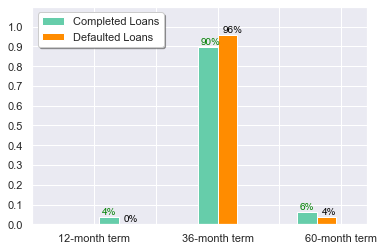

In [163]:
size=12
x = complete_loans['Term']
y = badloans['Term']
counts, bins, bars = plt.hist([x, y], label=['Completed Loans','Defaulted Loans'],  bins=5, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'])


counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+1.5,counts_0[i]+.01, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+5.8,counts_1[i]+.01, s=f"{val:.0f}%",color='black')  

plt.xlim(0,65)
plt.xticks(np.arange(0,60+2,12),labels=['','12-month term','','36-month term','','60-month term'])
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.1,0.1))

plt.legend(loc='upper left',facecolor='white',shadow=True)

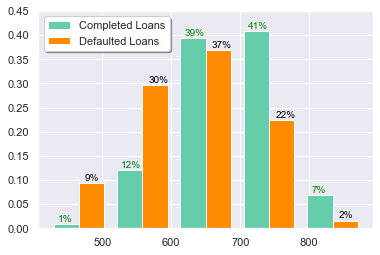

In [111]:
x = complete_loans['CreditScoreRangeLower']
y = badloans['CreditScoreRangeLower']
counts, bins, bars = plt.hist([x, y], label=['Completed Loans', 'Defaulted Loans'], bins=5, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'])

counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+15,counts_0[i]+.005, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+55,counts_1[i]+.005, s=f"{val:.0f}%",color='black') 

plt.ylim(0,.45)
plt.yticks(np.arange(0,.45+.01,.05))
plt.legend(loc='upper left', facecolor='white',shadow=True);

In [44]:
loan_category = clean_loans.query("LoanStatus == 'Completed' or LoanStatus == 'Defaulted'")
complete_reg = clean_loans.query("LoanStatus == 'Completed'")
default_reg = clean_loans.query("LoanStatus == 'Defaulted'")
loan_category.LoanStatus.value_counts()

Completed    37619
Defaulted     4833
Name: LoanStatus, dtype: int64

<Figure size 576x432 with 0 Axes>

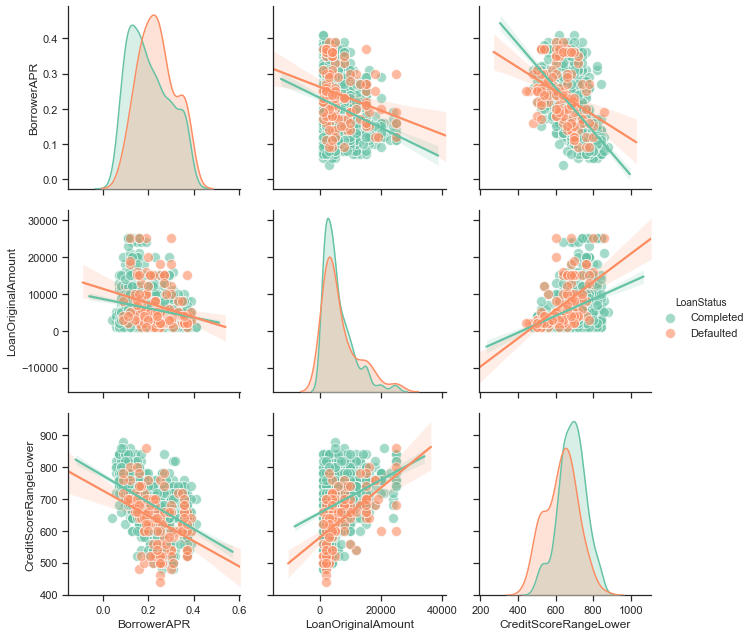

In [45]:
sns.set_style('ticks')
fig = plt.figure(figsize=(8,6))


sns.pairplot(loan_category.sample(1000),vars = ['BorrowerAPR', 'LoanOriginalAmount', 'CreditScoreRangeLower'], kind='reg',
            plot_kws=dict(scatter_kws=dict(alpha =0.6, s = 100,edgecolor='white')), hue="LoanStatus", palette="Set2", height=3);


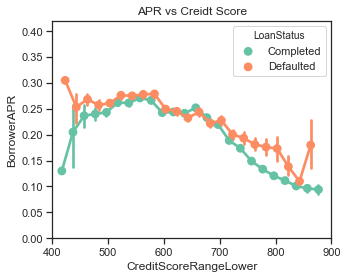

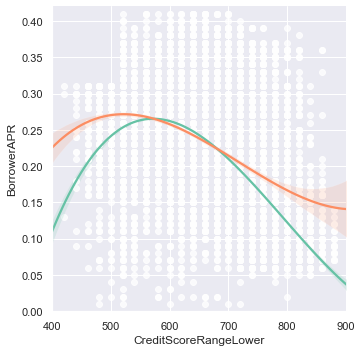

In [140]:
sns.set_style('ticks')
plt.figure(figsize = [5, 4])
sns.pointplot(data = loan_category, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue = 'LoanStatus',
                  dodge = 0.3, palette="Set2")

plt.title('APR vs Creidt Score')
plt.xlim(-1,24)
plt.xticks(np.arange(-1,24+1,5),labels=['400','500','600','700','800','900'])
plt.ylim(0,.42);

sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue="LoanStatus", data=loan_category,palette="Set2",
          scatter_kws={'color':'white'}, legend=False, order=3)
plt.xlim(400,900)
plt.ylim(0,.42);

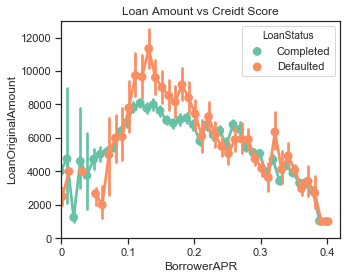

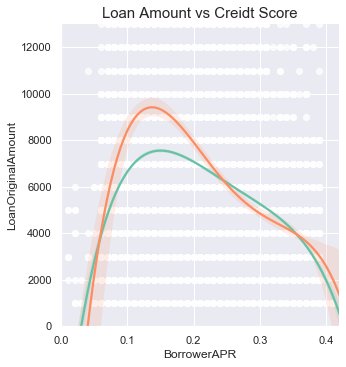

In [139]:
sns.set_style('ticks')


plt.figure(figsize = [5, 4])
sns.pointplot(data = loan_category, x = 'BorrowerAPR', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, palette="Set2")

plt.title('Loan Amount vs Creidt Score')
plt.xticks([0,10,20,30,40], [0,0.1, .2, .3, 0.4])
plt.xlim(0,42)
plt.ylim(0,13000);
sns.set_style('darkgrid')
sns.lmplot(x = 'BorrowerAPR', y = 'LoanOriginalAmount', hue="LoanStatus", data=loan_category,palette="Set2",
           scatter_kws={'color':'white'},legend=False, order=4)
plt.title('Loan Amount vs Creidt Score',size= 15)
plt.ylim(0,13000)
plt.xlim(0,.42);

''

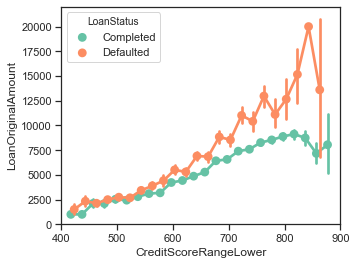

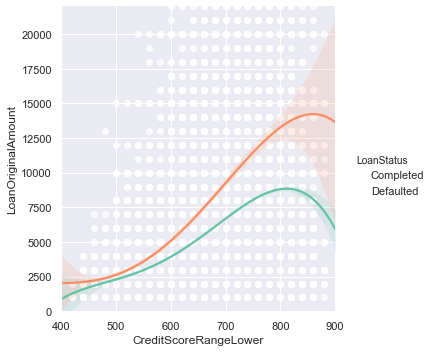

In [136]:
sns.set_style('ticks')
plt.figure(figsize = [5, 4])
sns.pointplot(data = loan_category, x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, palette="Set2")
plt.xlim(-1,24)
plt.xticks(np.arange(-1,24+1,5),labels=['400','500','600','700','800','900'])
plt.ylim(0,22000)
;
sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', hue="LoanStatus", data=loan_category,palette="Set2",
          scatter_kws={'color':'white'}, order=4)
plt.xlim(400,900)
plt.ylim(0,22000)
;